<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/version_3/C1/W4/ungraded_labs/C1_W4_Lab_2_image_generator_with_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ungraded Lab: ImageDataGenerator with a Validation Set

In this lab, you will continue using the `ImageDataGenerator` class to prepare the `Horses or Humans` dataset. This time, you will add a validation set so you can also measure how well the model performs on data it hasn't seen.

**IMPORTANT NOTE:** This notebook is designed to run as a Colab. Running it on your local machine might result in some of the code blocks throwing errors.

Run the code blocks below to download the datasets `horse-or-human.zip` and `validation-horse-or-human.zip` respectively.

In [1]:
# Install packages for compatibility

# NOTE: You can safely ignore errors about version incompatibility of
# Colab-bundled packages (e.g. xarray, pydantic, etc.)

#!pip install tf-keras==2.15 --quiet
#!pip install tensorflow==2.15 --quiet
#!pip install keras==2.15 --quiet

In [2]:
# Download the training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2025-03-26 00:16:04--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.197.207, 74.125.135.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  81.4MB/s    in 1.8s    

2025-03-26 00:16:06 (81.4 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [3]:
# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2025-03-26 00:16:06--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.197.207, 74.125.135.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2025-03-26 00:16:07 (73.1 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



Then unzip both archives.

In [4]:
import zipfile

# Unzip training set
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

# Unzip validation set
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

Similar to the previous lab, you will define the directories containing your images. This time, you will include those with validation data.

In [5]:
import os

# Directory with training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

Now see what the filenames look like in these directories:

In [6]:
train_horse_names = os.listdir(train_horse_dir)
print(f'TRAIN SET HORSES: {train_horse_names[:10]}')

train_human_names = os.listdir(train_human_dir)
print(f'TRAIN SET HUMANS: {train_human_names[:10]}')

validation_horse_names = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

TRAIN SET HORSES: ['horse31-6.png', 'horse49-1.png', 'horse50-0.png', 'horse34-1.png', 'horse45-8.png', 'horse32-4.png', 'horse06-5.png', 'horse44-3.png', 'horse17-0.png', 'horse08-5.png']
TRAIN SET HUMANS: ['human10-09.png', 'human01-19.png', 'human13-09.png', 'human14-15.png', 'human14-05.png', 'human07-07.png', 'human17-22.png', 'human07-05.png', 'human04-04.png', 'human11-17.png']
VAL SET HORSES: ['horse1-122.png', 'horse4-345.png', 'horse4-102.png', 'horse2-383.png', 'horse5-235.png', 'horse6-004.png', 'horse3-484.png', 'horse4-503.png', 'horse1-224.png', 'horse5-076.png']
VAL SET HUMANS: ['valhuman04-17.png', 'valhuman04-03.png', 'valhuman03-09.png', 'valhuman05-06.png', 'valhuman01-14.png', 'valhuman05-11.png', 'valhuman04-07.png', 'valhuman01-01.png', 'valhuman03-22.png', 'valhuman03-08.png']


You can find out the total number of horse and human images in the directories:

In [7]:
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


Now take a look at a few pictures to get a better sense of what they look like. First, configure the `matplotlib` parameters:

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 horse and 8 human pictures. You can rerun the cell to see a fresh batch each time:

In [9]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


Output hidden; open in https://colab.research.google.com to view.

## Building a Small Model from Scratch

You will define the same model architecture as before:

In [23]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

class Model:
    def __init__(self, input_shape, filters, kernel_size, pool_size):
        self.input_shape = input_shape
        self.filters = filters
        self.kernel_size = kernel_size
        self.pool_size = pool_size
        self.model = self.build_model()

    def build_model(self):
        model = Sequential()
        # Note the input shape is the desired size of the image 300x300 with 3 bytes color
        # Convolution layers
        for idx, f in enumerate(self.filters):
            if idx == 0:
                model.add(Conv2D(filters=f, kernel_size=self.kernel_size, activation='relu', input_shape=self.input_shape))
                model.add(MaxPooling2D(pool_size=self.pool_size))
            else:
                model.add(Conv2D(filters=f, kernel_size=self.kernel_size, activation='relu'))
                model.add(MaxPooling2D(pool_size=self.pool_size))
        # Flatten the results to feed into a DNN
        model.add(Flatten())
        # 512 neuron hidden layer
        model.add(Dense(units=512, activation='relu'))
        # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
        model.add(Dense(units=1, activation='sigmoid'))
        return model

    def compile_model(self, loss='mse', optimizer=SGD(learning_rate=1e-6, momentum=0.9), metrics=None):
        self.model.compile(
            loss=loss,
            optimizer=optimizer,
            metrics=metrics if metrics else []
        )

    def train_model(self, dataset, steps_per_epoch=10, num_epochs=30, validation_data=None, validation_steps=None, callbacks=None, verbose=1):
        history = self.model.fit(
            dataset,
            steps_per_epoch=steps_per_epoch,
            epochs=num_epochs,
            validation_data = validation_data,
            validation_steps = validation_steps,
            callbacks=callbacks if callbacks else [],
            verbose=verbose
        )
        return history

    def summary_model(self):
        self.model.summary()

    def prediction_model(self, data, batch_size, verbose=0):
        predictions = self.model.predict(data, batch_size=batch_size, verbose=verbose)
        return predictions

In [24]:
input_shape = (300, 300, 3)
filters = [16, 32, 64, 64, 64]
kernel_size = (3, 3)
pool_size = (2, 2)

# Create an instance of the Model class
model = Model(input_shape, filters, kernel_size, pool_size)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


You can review the network architecture and the output shapes with `model.summary()`.

In [25]:
model.summary_model()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 298, 298, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 149, 149, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 147, 147, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 71, 71, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 33, 33, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       1,606,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,704,097 (6.50 MB)

 Trainable params: 1,704,097 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

You will also use the same compile settings as before:

In [26]:
from tensorflow.keras.optimizers import RMSprop

model.compile_model(loss='binary_crossentropy',
                    optimizer=RMSprop(learning_rate=0.001),
                    metrics=['accuracy'])

### Data Preprocessing

Now you will setup the data generators. It will mostly be the same as last time but notice the additional code to also prepare the validation data. It will need to be instantiated separately and also scaled to have `[0,1]` range of pixel values.

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  # This is the source directory for validation images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


### Training
Now train the model for 15 epochs. Here, you will pass parameters for `validation_data` and `validation_steps`. With these, you will notice additional outputs in the print statements: `val_loss` and `val_accuracy`. Notice that as you train with more epochs, your training accuracy might go up but your validation accuracy goes down. This can be a sign of overfitting and you need to prevent your model from reaching this point.

In [28]:
history = model.train_model(
      train_generator,
      steps_per_epoch=8,
      num_epochs=30,
      validation_data=validation_generator,
      validation_steps=8,
      verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.5255 - loss: 0.6983 - val_accuracy: 0.5000 - val_loss: 0.6949
Epoch 2/30
1/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.3333 - loss: 0.6327

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.3333 - loss: 0.6327 - val_accuracy: 0.6602 - val_loss: 0.6739
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6862 - loss: 0.8828 - val_accuracy: 0.7891 - val_loss: 0.5673
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.8125 - loss: 0.5522 - val_accuracy: 0.7695 - val_loss: 0.5470
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7310 - loss: 0.5068 - val_accuracy: 0.8320 - val_loss: 0.4127
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 0.7500 - loss: 0.6326 - val_accuracy: 0.8477 - val_loss: 0.4392
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8532 - loss: 0.4084 - val_accuracy: 0.8867 - val_loss: 0.5353
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - accuracy: 0.7812 - loss: 0.4854 - val_accuracy: 0.5312 - val_loss: 1.7119
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7754 - loss: 0.4314 - val_accuracy: 0.7969 - val_loss: 1.1826
Epoch 10/30
8/

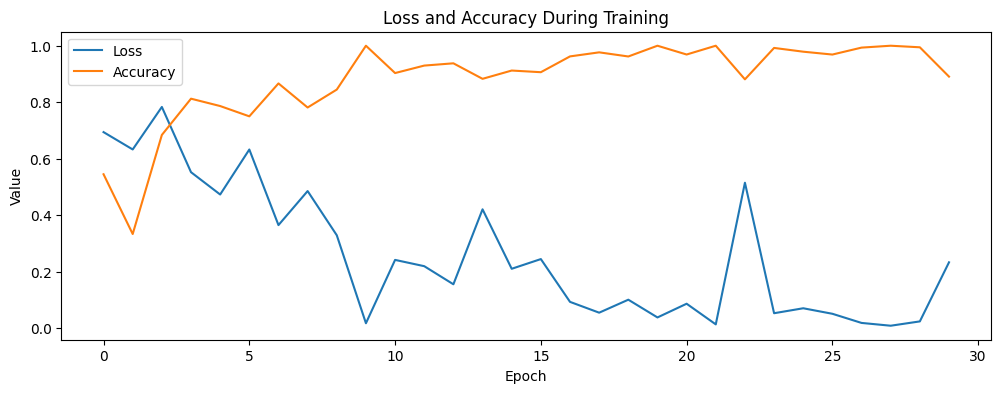

In [29]:
import matplotlib.pyplot as plt

# Plot loss and accuracy
def plot_accuracy_loss(history):
  plt.figure(figsize=(12, 4))

  plt.plot(history.history['loss'], label='Loss')
  plt.plot(history.history['accuracy'], label='Accuracy')
  plt.title('Loss and Accuracy During Training')
  plt.xlabel('Epoch')
  plt.ylabel('Value')
  plt.legend()
  plt.show()

plot_accuracy_loss(history)

### Model Prediction

Now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, upload them, and run them through the model, giving an indication of whether the object is a horse or a human.

_**Note:** Old versions of the Safari browser might have compatibility issues with the code block below. If you get an error after you select the images(s) to upload, you can consider updating your browser to the latest version. If not possible, please comment out or skip the code block below, uncomment the next code block and run it._

In [31]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")


Saving horse-1.jpg to horse-1 (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[0.15648872]
horse-1 (1).jpg is a horse


If you're using Safari and the cell above throws an error, you will need to upload the images(s) manually in their workspace.

Instructions on how to upload image(s) manually in a Colab:

1. Select the `folder` icon on the left `menu bar`.
2. Click on the `folder with an arrow pointing upwards` named `..`
3. Click on the `folder` named `tmp`.
4. Inside of the `tmp` folder, `create a new folder` called `images`. You'll see the `New folder` option by clicking the `3 vertical dots` menu button next to the `tmp` folder.
5. Inside of the new `images` folder, upload an image(s) of your choice, preferably of either a horse or a human. Drag and drop the images(s) on top of the `images` folder.
6. Uncomment and run the code block below.

In [ ]:
# # CODE BLOCK FOR OLDER VERSIONS OF SAFARI

# import numpy as np
# from tensorflow.keras.utils import load_img, img_to_array
# import os

# images = os.listdir("/tmp/images")

# print(images)

# for i in images:
#  print()
#  # predicting images
#  path = '/tmp/images/' + i
#  img = load_img(path, target_size=(300, 300))
#  x = img_to_array(img)
#  x /= 255
#  x = np.expand_dims(x, axis=0)

#  images = np.vstack([x])
#  classes = model.predict(images, batch_size=10)
#  print(classes[0])
#  if classes[0]>0.5:
#    print(i + " is a human")
#  else:
#    print(i + " is a horse")

### Visualizing Intermediate Representations

As before, you can plot how the features are transformed as it goes through each layer.

In [35]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img
import tensorflow as tf

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x

    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

AttributeError: The layer sequential_2 has never been called and thus has no defined input.

## Clean Up

Before running the next exercise, run the following cell to terminate the kernel and free memory resources:

In [36]:
from google.colab import runtime
runtime.unassign()